## Simulating spreading models on networks

Today we are going to simulate SI and SIS models on simulated networks. We will write some functions to simulate spreading and compare how network topology influences spreading.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

%matplotlib inline

### We will store the state of each node in a node attribute called "state"

In [2]:
G = nx.erdos_renyi_graph(100,.05)
G = max(nx.connected_component_subgraphs(G), key=len) #for convenience - only use the giant component
intialization={node:'S' for node in G.nodes()} #susceptible
nx.set_node_attributes(G,intialization,'state')

## Now pick a random node to be the first infected node - patient zero! Let's draw the network and highlight the node.

In [3]:
patient_zero=random.choice(list(G.nodes())) #randomly select a node
G.nodes[patient_zero]['state']='I' #change its state to "I"- infected

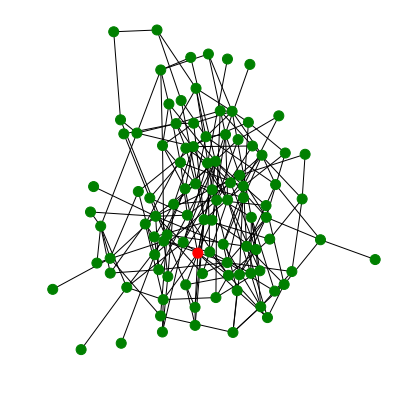

In [5]:
positions = nx.spring_layout(G)
plt.figure(figsize=(5,5))
color_map = {}
for node in G.nodes():
    if G.nodes[node]['state'] =='S':
        color_map[node]='green'
    else:
        color_map[node]='red'
nx.draw(G,pos=positions,node_color = list(color_map.values()),node_size=100)
plt.show()

## Let us put this initialization into a function for convenience

In [6]:
def initialize_er(n_nodes,p):
    G = nx.erdos_renyi_graph(n_nodes,p)
    G = max(nx.connected_component_subgraphs(G), key=len) #for convenience - only use the giant component
    intialization={node:'S' for node in G.nodes()} #susceptible
    nx.set_node_attributes(G,intialization,'state')
    patient_zero=random.choice(list(G.nodes())) #randomly select a node
    G.nodes[patient_zero]['state']='I' #change its state to "I"- infected
    positions = nx.spring_layout(G) #set positions
    nx.set_node_attributes(G,positions,'positions')
    return G

## And the plotting

In [8]:
def plot_spreading(network):
    plt.figure(figsize=(5,5))
    color_map = {}
    for node in network.nodes():
        if network.nodes[node]['state'] =='S':
            color_map[node]='green'
        else:
            color_map[node]='red'
    nx.draw(network,pos=nx.get_node_attributes(network,'positions'),node_color = list(color_map.values()),node_size=100)
    plt.show()

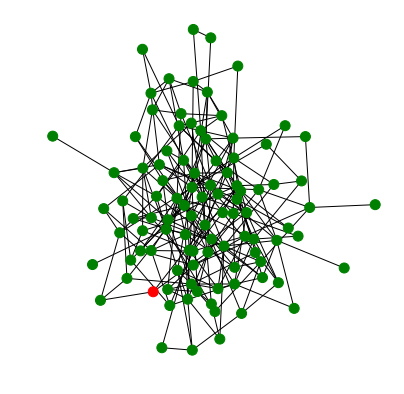

In [9]:
#Test:
G=initialize_er(100,.05)
plot_spreading(G)

## Task 1: Write a function for one step of the spreading - each neighbor of an infected node has a probability of becoming infected (beta from the lecture). There are many ways to do this, but here is one outline.

- Get a dictionary of the node states (nx.get_node_attributes)
- loop over the nodes in the network
- if the node if suspectible, loop over its neighbors
- for each infected neighbor, "roll a dice" using random.random and compare it with beta.


In [10]:
def spread_infection(network, beta):
    node_states=nx.get_node_attributes(network,'state')
    for node in network.nodes():
        if node_states[node]=='S':
            for neighbor in network.neighbors(node):
                if node_states[neighbor]=='I':
                    if random.random() < beta:
                        network.nodes[node]['state']='I'

## Test your function in the following code:

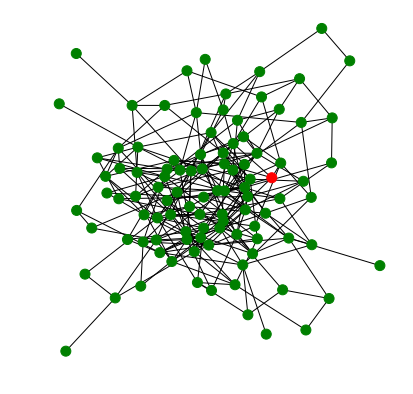

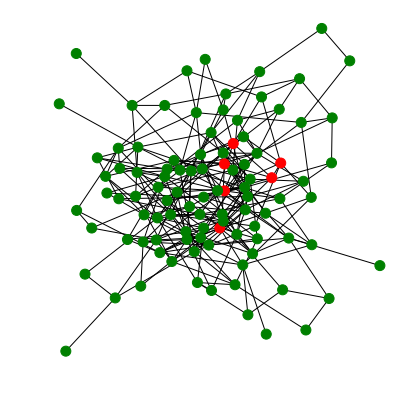

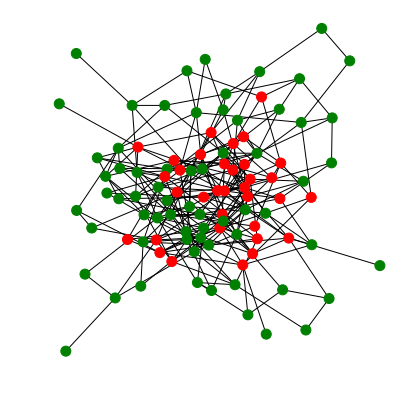

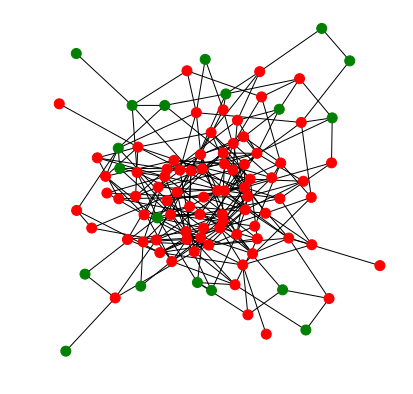

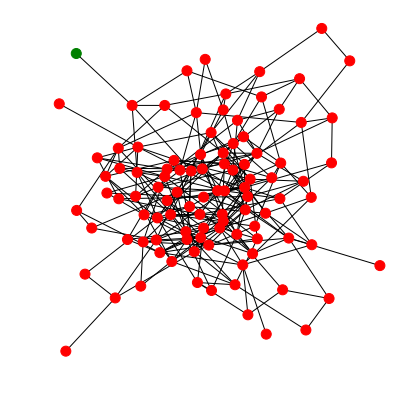

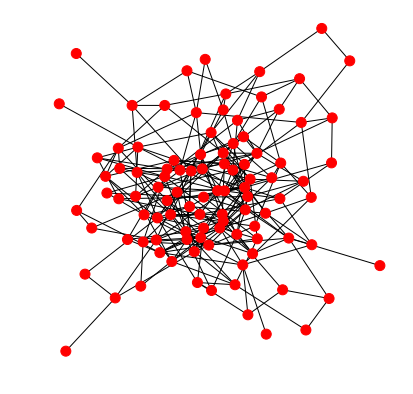

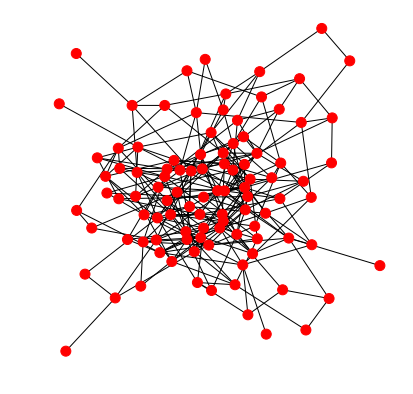

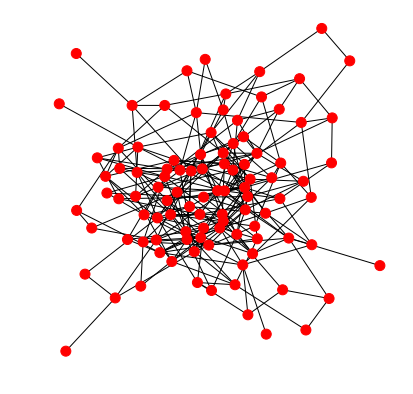

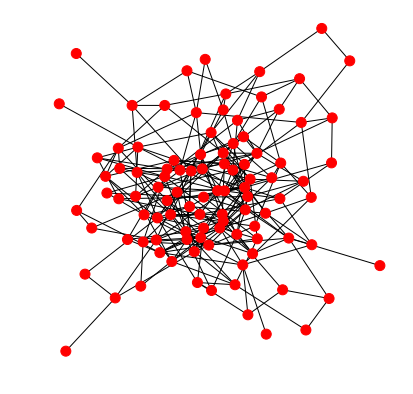

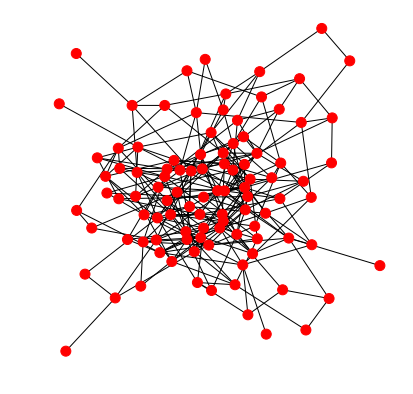

In [12]:
G=initialize_er(100,.05)
for _ in range(10):
    plot_spreading(G)
    spread_infection(G,1)

## Task 2: Write a function that creates a network and simulates a number of time steps, with probability of infection equal to beta, and returns a list of the percent of infected notes after each step.

In [13]:
def simulate_epidemic_er(n_nodes,p,steps,beta):
    G=initialize_er(n_nodes,p)
    pct_infected = [1/n_nodes]
    for _ in range(steps):
        spread_infection(G,beta)
        node_states = nx.get_node_attributes(G,'state')
        count_infected = 0
        for node in node_states:
            if node_states[node]=='I':
                count_infected+=1
        pct_infected.append(count_infected/n_nodes)
    return pct_infected

## Test your function with the following plots

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

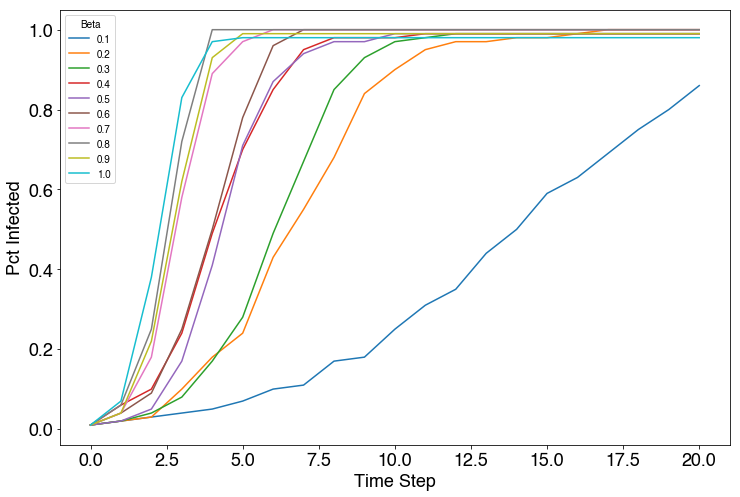

In [17]:
plt.figure(figsize=(12,8))
for beta in np.linspace(.1,1,10):
    plt.plot(simulate_epidemic_er(100,.05,20,beta),label=round(beta,1))
plt.legend(title='Beta')
plt.ylabel('Pct Infected',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)

## Task 3: Repeat the analysis with a Barabasi-Albert network instead of an Erdos-Renyi network. Use 200 nodes and m = 4. First visualize the spreading by drawing the network with beta = 1, then plot the percent of infected nodes over time for different betas. 

In [18]:
def initialize_ba(n_nodes,m):
    G = nx.barabasi_albert_graph(n_nodes,m)
    G = max(nx.connected_component_subgraphs(G), key=len) #for convenience - only use the giant component
    intialization={node:'S' for node in G.nodes()} #susceptible
    nx.set_node_attributes(G,intialization,'state')
    patient_zero=random.choice(list(G.nodes())) #randomly select a node
    G.nodes[patient_zero]['state']='I' #change its state to "I"- infected
    positions = nx.spring_layout(G) #set positions
    nx.set_node_attributes(G,positions,'positions')
    return G

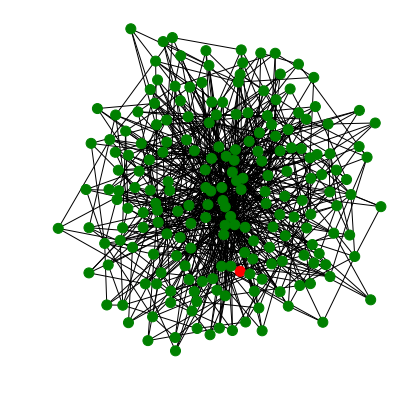

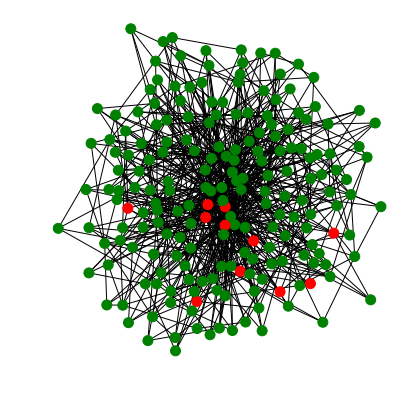

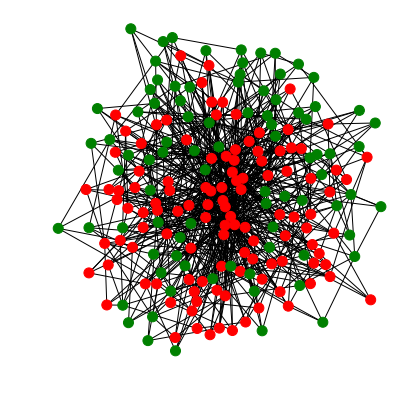

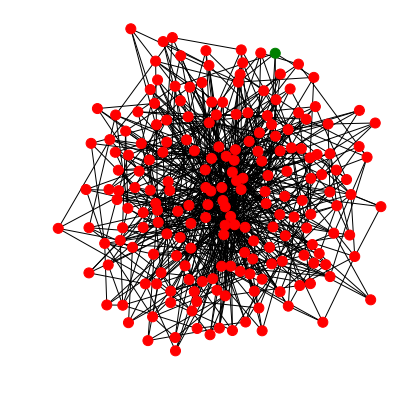

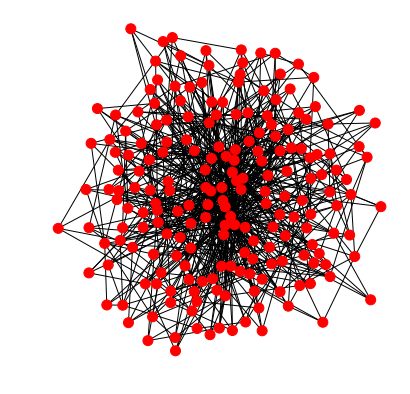

In [22]:
G=initialize_ba(200,4)
for _ in range(5):
    plot_spreading(G)
    spread_infection(G,1)

In [23]:
def simulate_epidemic_ba(n_nodes,m,steps,beta):
    G=initialize_ba(n_nodes,m)
    pct_infected = [1/n_nodes]
    for _ in range(steps):
        spread_infection(G,beta)
        node_states = nx.get_node_attributes(G,'state')
        count_infected = 0
        for node in node_states:
            if node_states[node]=='I':
                count_infected+=1
        pct_infected.append(count_infected/n_nodes)
    return pct_infected

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

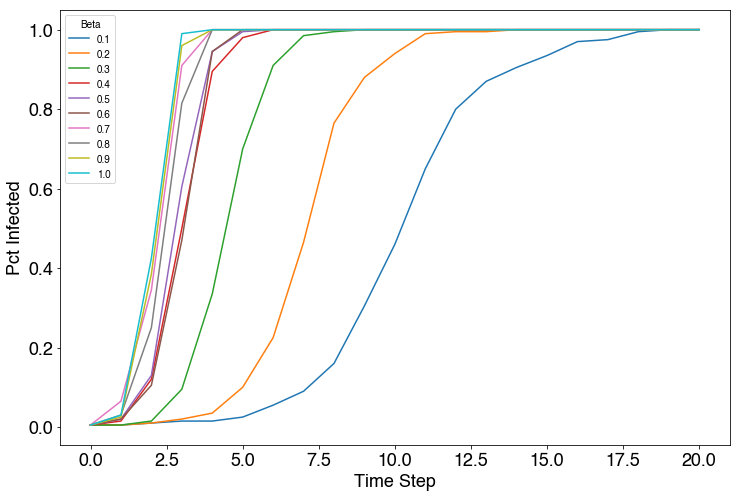

In [24]:
plt.figure(figsize=(12,8))
for beta in np.linspace(.1,1,10):
    plt.plot(simulate_epidemic_ba(200,4,20,beta),label=round(beta,1))
plt.legend(title='Beta')
plt.ylabel('Pct Infected',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)

##  Task 3: Repeat the analysis with a stochastic block model with two communities of 100 nodes each, with probability of within community edges = .1, between community edges probability = .001. Hint: use nx.stochastic_block_model and read its description carefully.

In [270]:
nx.stochastic_block_model?

In [25]:
def initialize_sbm(list_of_community_sizes,matrix_probabilities):
    G = nx.stochastic_block_model(list_of_community_sizes,matrix_probabilities)
    G = max(nx.connected_component_subgraphs(G), key=len) #for convenience - only use the giant component
    intialization={node:'S' for node in G.nodes()} #susceptible
    nx.set_node_attributes(G,intialization,'state')
    patient_zero=random.choice(list(G.nodes())) #randomly select a node
    G.nodes[patient_zero]['state']='I' #change its state to "I"- infected
    positions = nx.spring_layout(G) #set positions
    nx.set_node_attributes(G,positions,'positions')
    return G

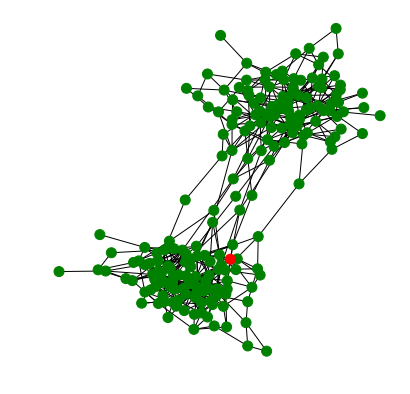

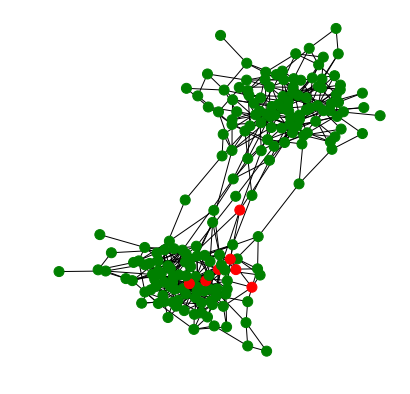

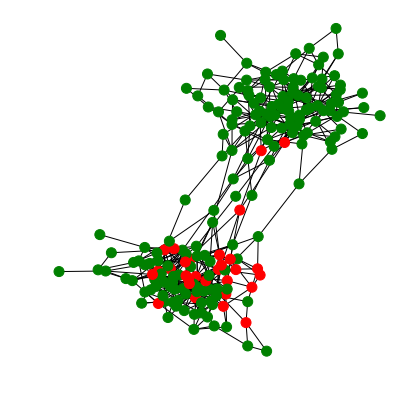

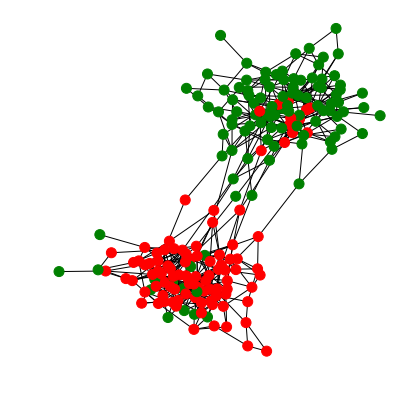

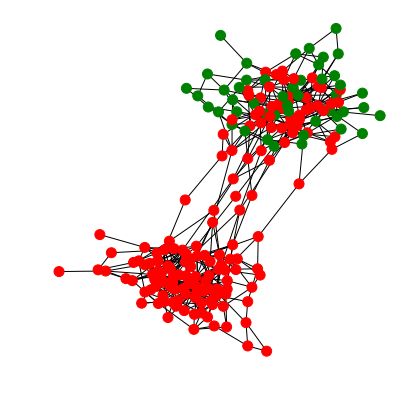

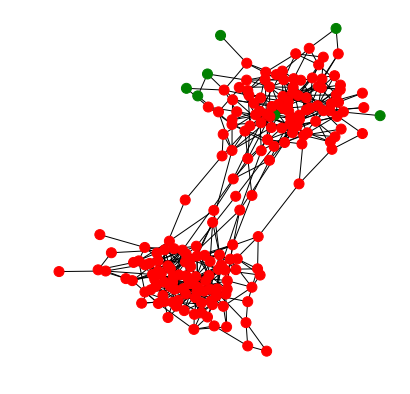

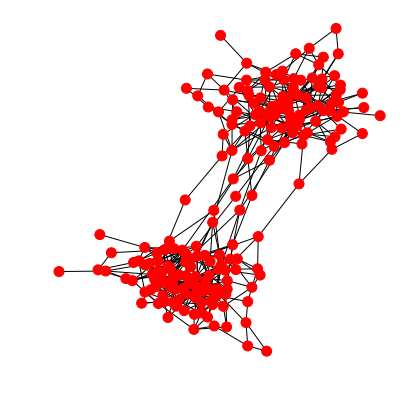

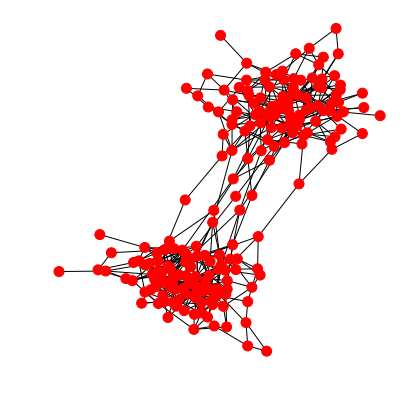

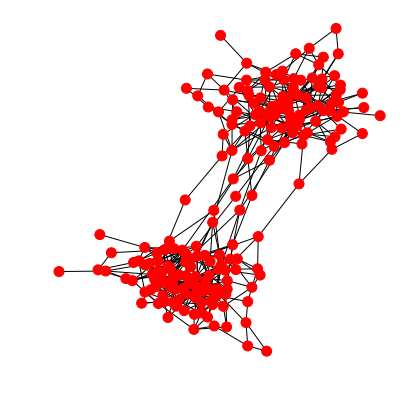

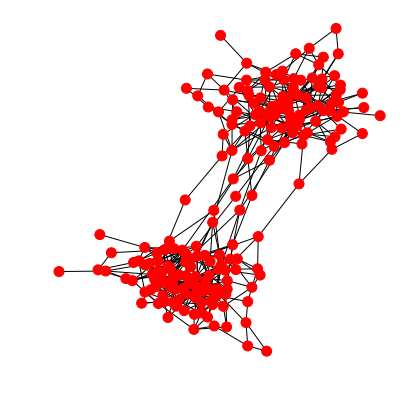

In [26]:
G=initialize_sbm([100,100],[[.05,.001],[.001,.05]])
for _ in range(10):
    plot_spreading(G)
    spread_infection(G,1)

In [27]:
def simulate_epidemic_sbm(list_of_community_sizes,matrix_probabilities,steps,beta):
    G=initialize_sbm(list_of_community_sizes,matrix_probabilities)
    n_nodes = len(G.nodes())
    pct_infected = [1/n_nodes]
    for _ in range(steps):
        spread_infection(G,beta)
        node_states = nx.get_node_attributes(G,'state')
        count_infected = 0
        for node in node_states:
            if node_states[node]=='I':
                count_infected+=1
        pct_infected.append(count_infected/n_nodes)
    return pct_infected

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

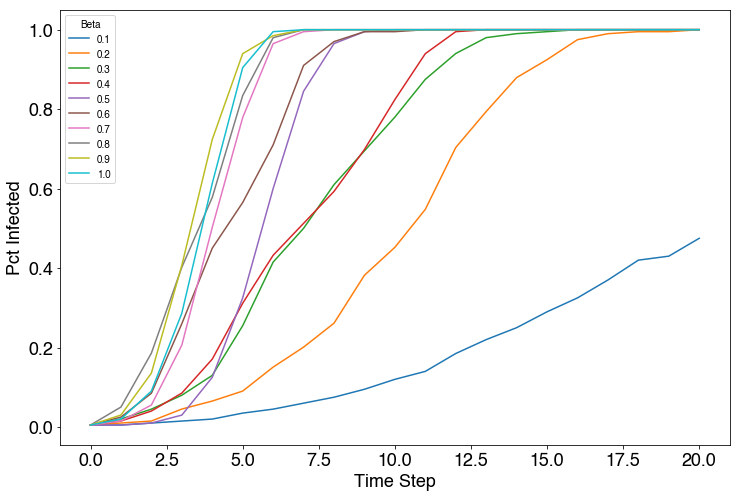

In [28]:
plt.figure(figsize=(12,8))
for beta in np.linspace(.1,1,10):
    plt.plot(simulate_epidemic_sbm([100,100],[[.05,.001],[.001,.05]],20,beta),label=round(beta,1))
plt.legend(title='Beta')
plt.ylabel('Pct Infected',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)

## Task 4: Come up with your own stochastic block model design and repeat the analysis. Here is one idea:

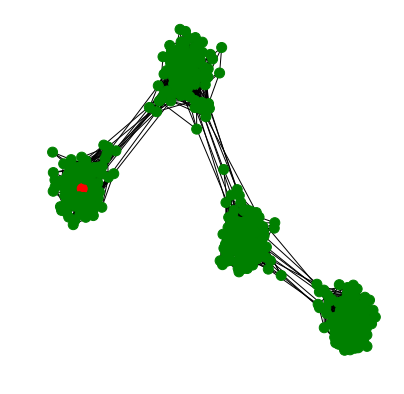

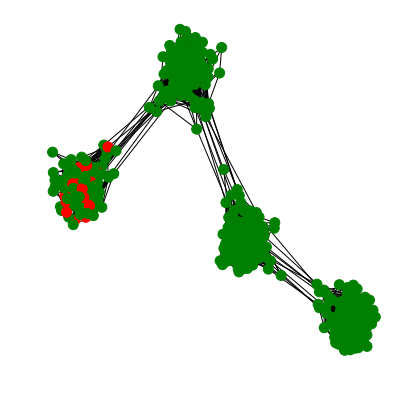

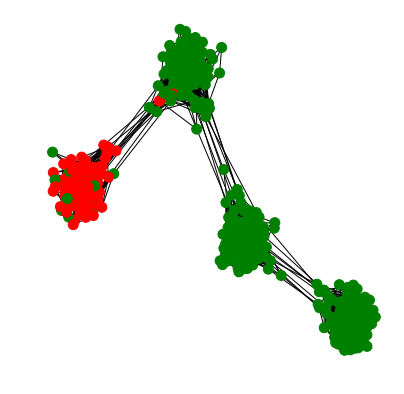

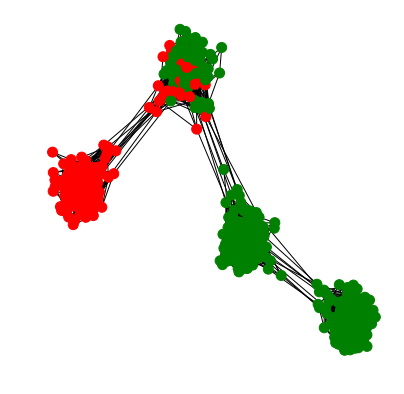

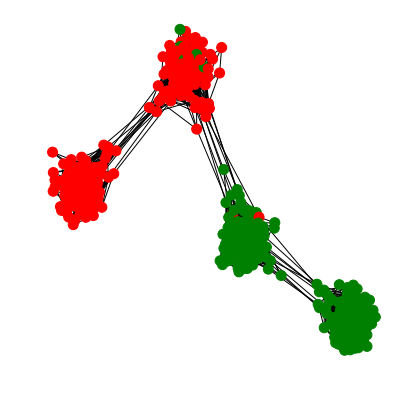

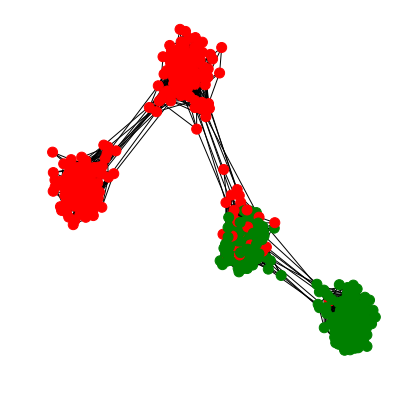

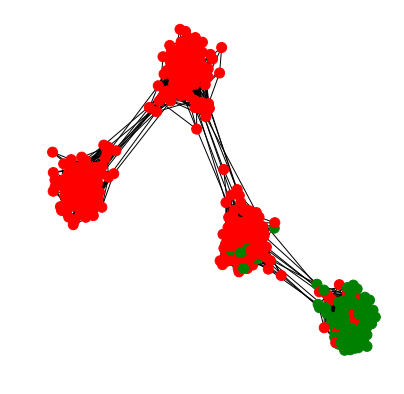

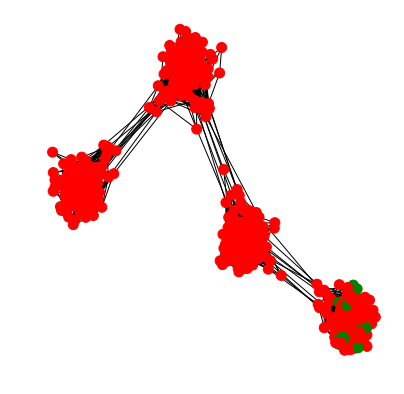

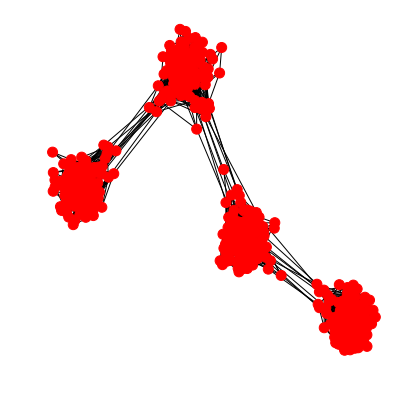

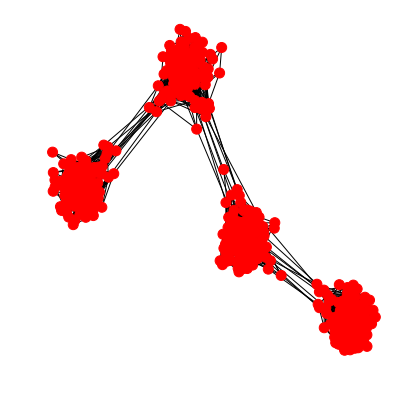

In [29]:
G=initialize_sbm([100,100,100,100],[[.1,.001,0,0],
                                [.001,.1,.001,0],
                                [0,.001,.1,.001],
                                [0,0,.001,.1]])
for _ in range(10):
    plot_spreading(G)
    spread_infection(G,1)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

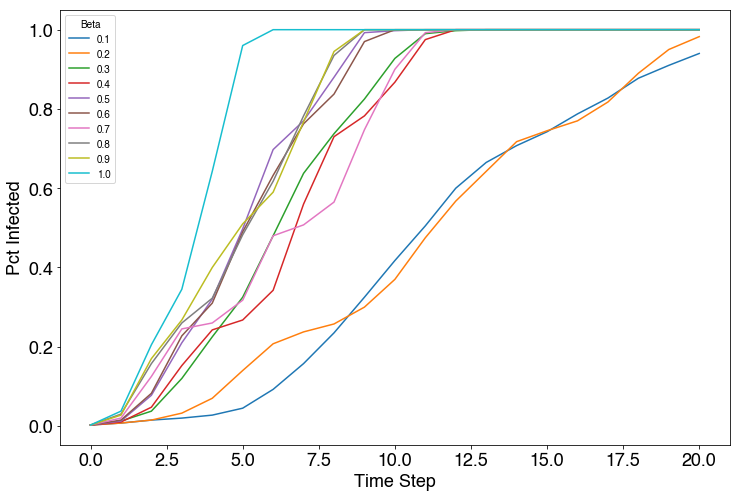

In [30]:
plt.figure(figsize=(12,8))
for beta in np.linspace(.1,1,10):
    plt.plot(simulate_epidemic_sbm([100,100,100,100],
                                   [[.1,.001,0,0],
                                [.001,.1,.001,0],
                                [0,.001,.1,.001],
                                [0,0,.001,.1]],20,beta),label=round(beta,1))
plt.legend(title='Beta')
plt.ylabel('Pct Infected',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)

## Task 5: Create a new function that spreads an infection with an SIS process. Infected nodes return to being susceptible with probability mu.

In [295]:
def spread_infection_SIS(network, beta, mu):
    node_states=nx.get_node_attributes(network,'state')
    for node in network.nodes():
        if node_states[node]=='S':
            for neighbor in network.neighbors(node):
                if node_states[neighbor]=='I':
                    if random.random() < beta:
                        network.nodes[node]['state']='I'
        if node_states[node]=='I':
            if random.random()<mu:
                network.nodes[node]['state']='S'

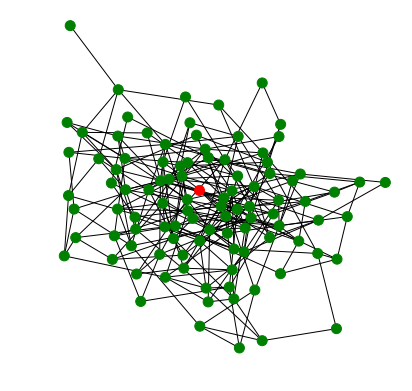

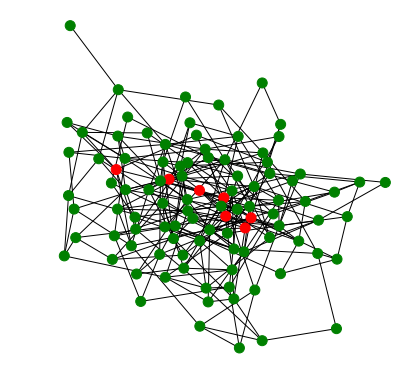

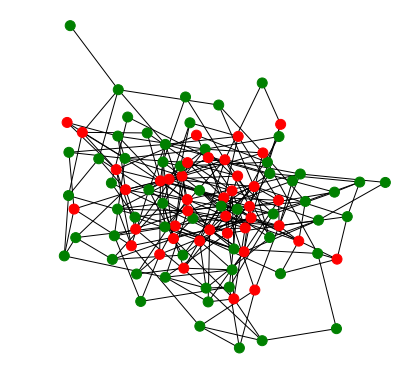

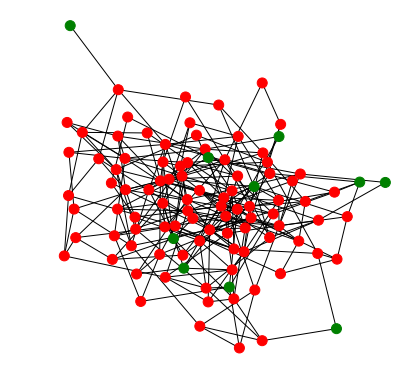

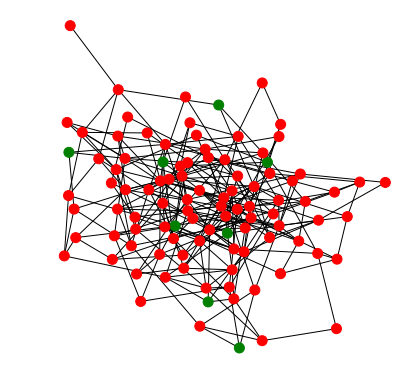

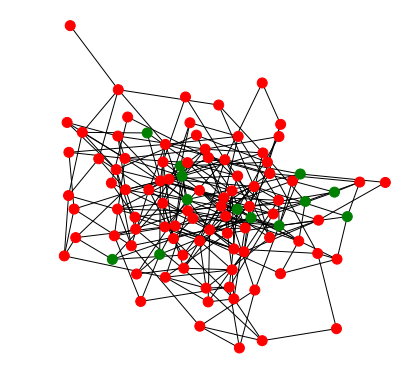

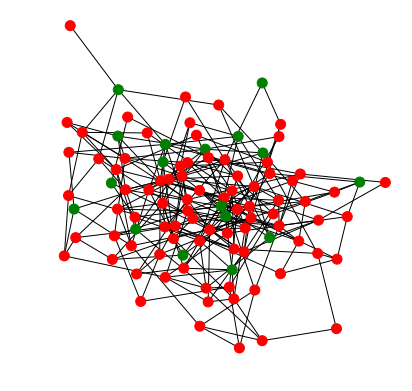

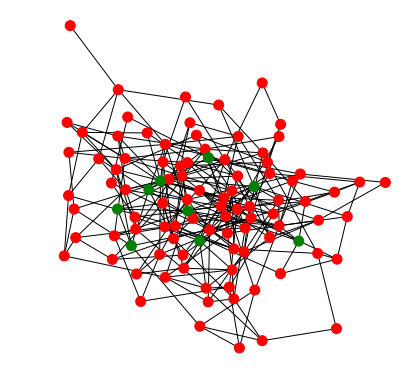

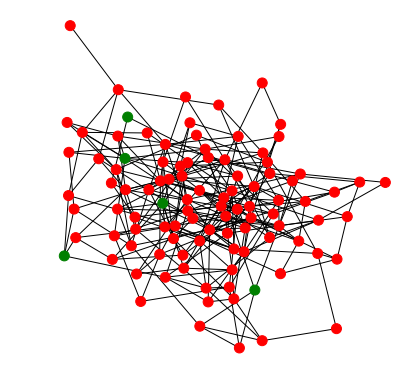

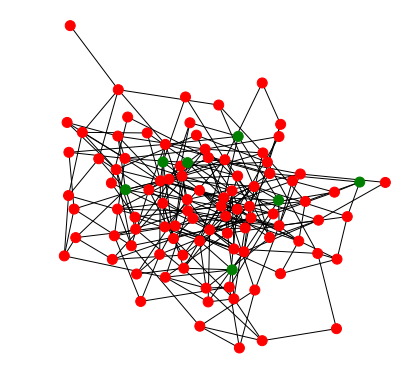

In [305]:
G=initialize_er(100,.05)
for _ in range(10):
    plot_spreading(G)
    spread_infection_SIS(G,1,.1)

In [298]:
def simulate_epidemic_er_SIS(n_nodes,p,steps,beta,mu):
    G=initialize_er(n_nodes,p)
    pct_infected = [1/n_nodes]
    for _ in range(steps):
        spread_infection_SIS(G,beta,mu)
        node_states = nx.get_node_attributes(G,'state')
        count_infected = 0
        for node in node_states:
            if node_states[node]=='I':
                count_infected+=1
        pct_infected.append(count_infected/n_nodes)
    return pct_infected

(0, 1)

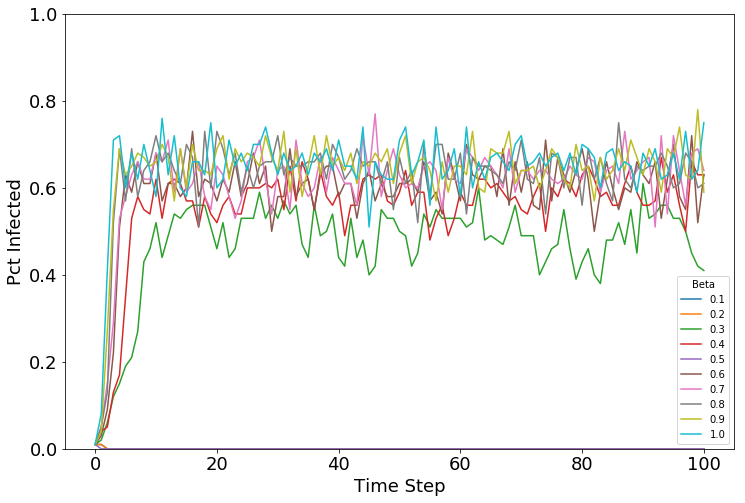

In [315]:
plt.figure(figsize=(12,8))
for beta in np.linspace(.1,1,10):
    plt.plot(simulate_epidemic_er_SIS(100,.05,100,beta,.5),label=round(beta,1))
plt.legend(title='Beta')
plt.ylabel('Pct Infected',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylim([0,1])